In [43]:
#import dependencies
import pandas as pd
import preprocess
from neural_network import neural_network

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut

from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score,accuracy_score

from sklearn.linear_model import LogisticRegression #for Logistic Regression
from sklearn import svm # for Support Vector Machine
from sklearn.naive_bayes import GaussianNB # for Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier # for KNN classifier 
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.tree import DecisionTreeClassifier # for decision tree classifier

# Preprocessing

In [2]:
## Read the wisconsin dataset
breast_ca = pd.read_csv('Dataset/breast-cancer-wisconsin.data',index_col=None,header=None)

## Run clean_impute function on dataset and save dataset (impute - MICE method)
df_impute = preprocess.clean_impute(breast_ca)
df_impute.to_csv('Dataset/processed/breast-cancer-wisconsin-imputed.csv',index=False)

## Read imputed wisconsin dataset
df = pd.read_csv("Dataset/processed/breast-cancer-wisconsin-imputed.csv")

Columns renaming successful
All '?' values replaced with 'NaN'

Calculate missing values from dataframe
sample_id            0
cl_thcknss           0
size_cell_un         0
shape_cell_un        0
marg_adhesion        0
size_cell_single     0
bare_nucl           16
bl_chrmatn           0
nrml_nucleo          0
mitoses              0
class                0
dtype: int64

Null values imputated using Multivariate Imputation by Chained Equation (MICE) method

Calculate missing values from imputated dataframe
sample_id           0
cl_thcknss          0
size_cell_un        0
shape_cell_un       0
marg_adhesion       0
size_cell_single    0
bare_nucl           0
bl_chrmatn          0
nrml_nucleo         0
mitoses             0
class               0
dtype: int64



In [3]:
# Remove the sample_id column
df = df.drop(columns=['sample_id'])

# Split the dataset into features/variables (X) and labels/outcome (y)
# Change values of 'class' from [2,4] to [0,1]
X = df.drop(columns=['class'])
y = df['class'].apply(lambda x: 1 if x == 4 else 0)

In [4]:
# Scale the features - Min and Max scaling (sensitive to outliers)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Descriptive Statistics

# Functions

In [5]:
def supervised_ml(algo_name,algorithm,cv_method):
    # Cross-Validation for small datasets to prevent biased and overfitting of model
    cv = cv_method()
    # Run supervised learning - Logistic Regression algorithm
    model = algorithm
    
    # LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction,probability and mean accuracy from all observations
    predictions = []
    probabilities = []
    scores = []
    
    # Loop through the cross-validation splits/observations
    for train_index, test_index in cv.split(X_scaled):
        # While splitting data into training and test sets
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train classifier
        model.fit(X_train,y_train)

        # Get prediction
        predicted_y = model.predict(X_test)

        # Get probability
        probability_y = model.predict_proba(X_test)[:,1]

        # Append each predicted label and probability score into list
        predictions.append(predicted_y[0])
        probabilities.append(probability_y[0])
        scores.append(accuracy_score(y_test, predicted_y))

    # Convert the lists to a Numpy Array
    predictions = np.array(predictions)
    probabilities = np.array(probabilities)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y,predictions)

    # Calculate the mean accuracy
    accuracy = sum(scores) / len(scores)
    print(f"{algo_name} Accuracy Score:", accuracy)
    
    # Calculate false +ve rate, true +ve rate and threshold values
    fpr, tpr, thresholds = roc_curve(y,probabilities)

    # Calculate area under the curve
    roc_auc = roc_auc_score(y,probabilities)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.title(f'{algo_name} Classification ROC')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    # Plot confusion matrix using Seaborn Heatmap
    sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
    plt.title(f'{algo_name} Classification Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()
    
    # Comprehensive Classification Report
    print(f'{algo_name} Classification Report')
    print(classification_report(y, predictions))
    
    # Combine the true labels and predicted labels into a dataframe
    df2 = pd.DataFrame({'Actual': y, 'Predicted': predictions})
    
    return predictions,probabilities,accuracy,cm,df2

# Logistic Regression

Logistic Regression Accuracy Score: 0.9642346208869814


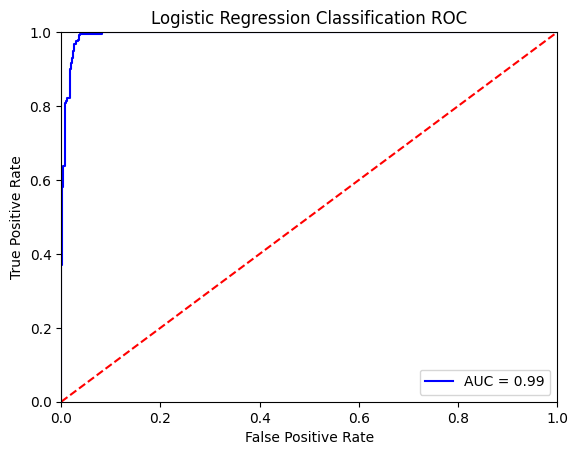

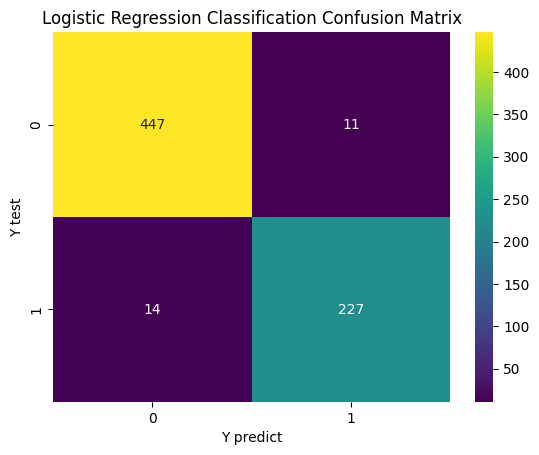

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       458
           1       0.95      0.94      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [6]:
logreg = supervised_ml('Logistic Regression',LogisticRegression(),LeaveOneOut)

In [7]:
#Actual vs Predicted values
logreg[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Naive Bayes - Gaussian

Naive Bayes - Gaussian Accuracy Score: 0.9585121602288984


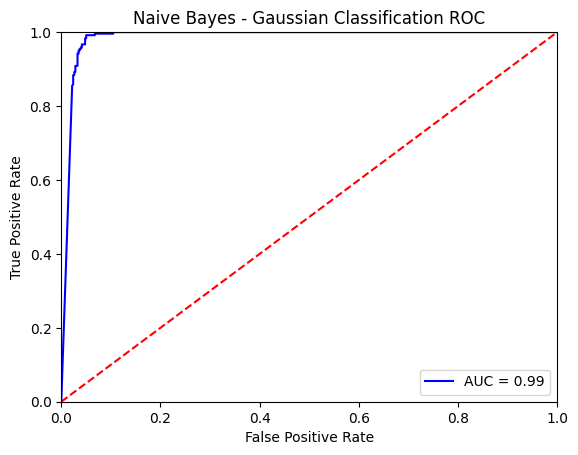

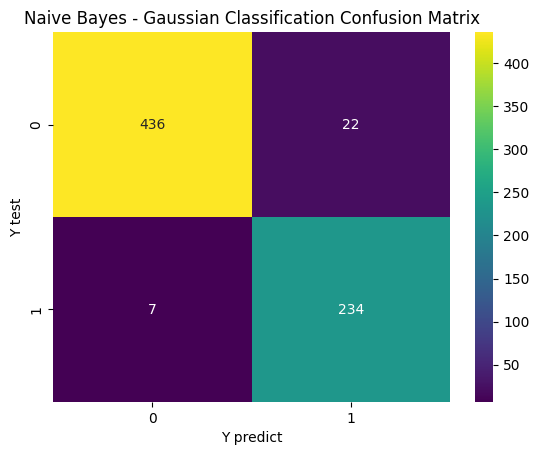

Naive Bayes - Gaussian Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       458
           1       0.91      0.97      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



In [8]:
nbcla = supervised_ml('Naive Bayes - Gaussian',GaussianNB(),LeaveOneOut)

In [9]:
#Actual vs Predicted values
nbcla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Support Vector Machine (SVM)

Support Vector Machine Accuracy Score: 0.9570815450643777


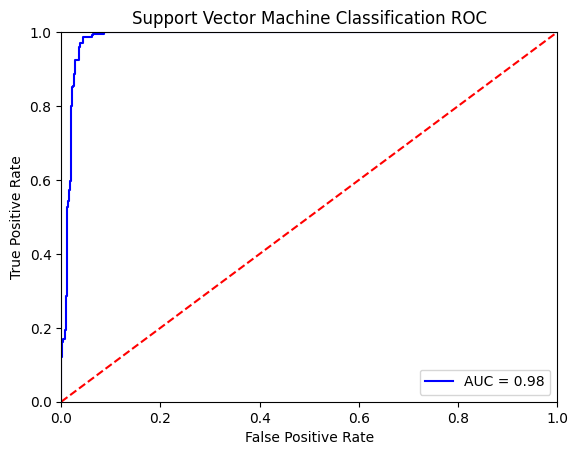

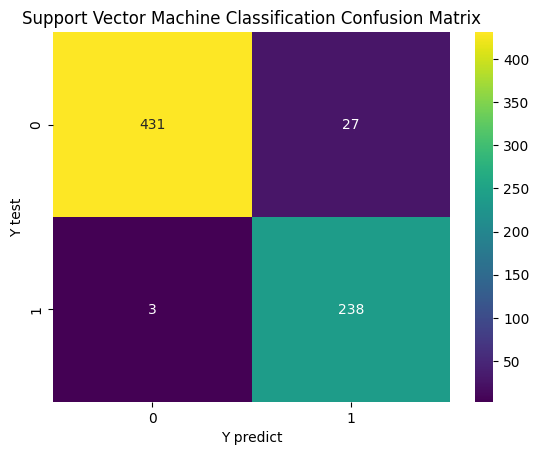

Support Vector Machine Classification Report
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       458
           1       0.90      0.99      0.94       241

    accuracy                           0.96       699
   macro avg       0.95      0.96      0.95       699
weighted avg       0.96      0.96      0.96       699



In [10]:
svmcla = supervised_ml('Support Vector Machine',svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
        max_iter=-1, probability=True, random_state=None, shrinking=False,
        tol=0.001, verbose=False),LeaveOneOut)

In [11]:
#Actual vs Predicted values
svmcla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# K-Nearest Neighbour (KNN)

K-Nearest Neighbors Accuracy Score: 0.9642346208869814


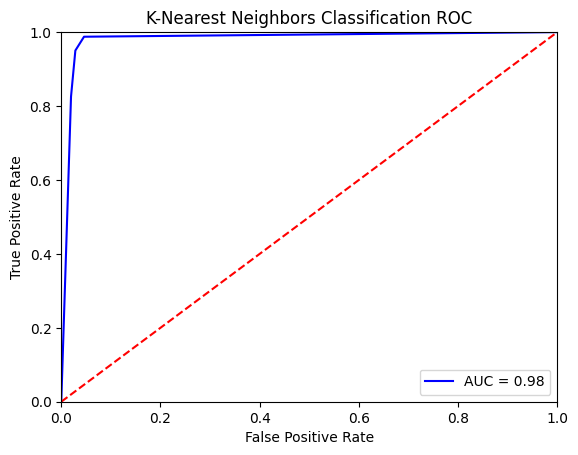

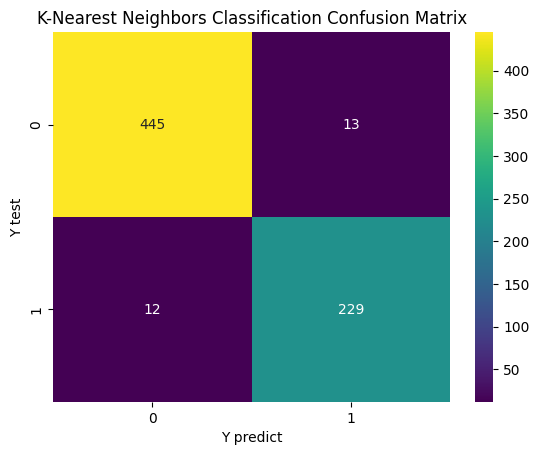

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       458
           1       0.95      0.95      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [12]:
knncla = supervised_ml('K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=3),LeaveOneOut)

In [13]:
#Actual vs Predicted values
knncla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Random Forest Classifier

Random Forest Accuracy Score: 0.9713876967095851


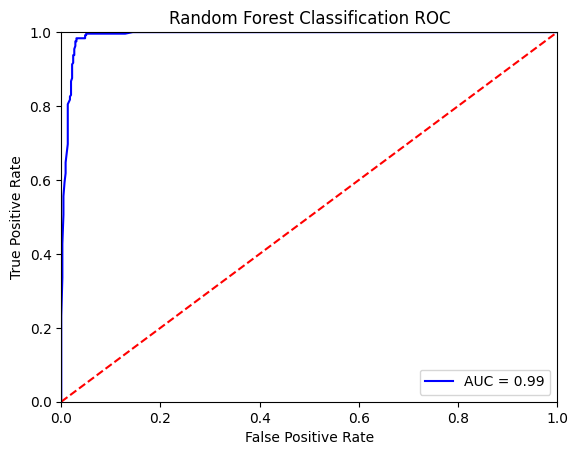

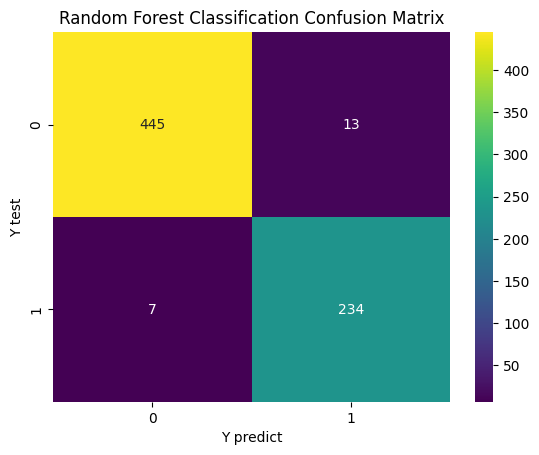

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       458
           1       0.95      0.97      0.96       241

    accuracy                           0.97       699
   macro avg       0.97      0.97      0.97       699
weighted avg       0.97      0.97      0.97       699



In [14]:
rfcla = supervised_ml('Random Forest',RandomForestClassifier(),LeaveOneOut)

In [15]:
rfcla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Decision Tree Classifier

Decision Tree Accuracy Score: 0.9456366237482118


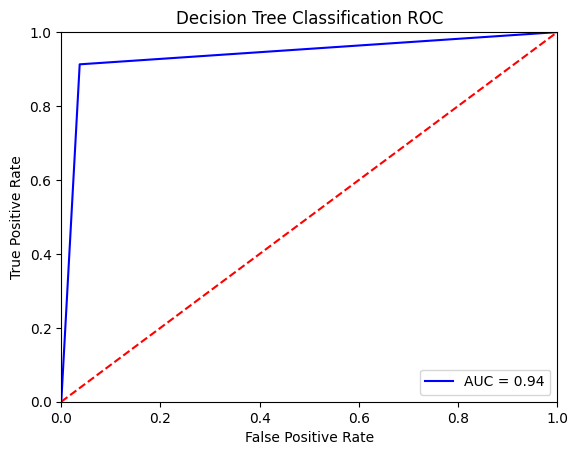

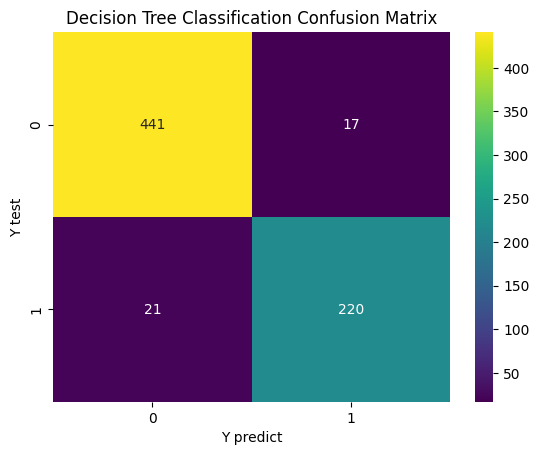

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       458
           1       0.93      0.91      0.92       241

    accuracy                           0.95       699
   macro avg       0.94      0.94      0.94       699
weighted avg       0.95      0.95      0.95       699



In [16]:
dtcla = supervised_ml('Decision Tree',DecisionTreeClassifier(),LeaveOneOut)

In [17]:
dtcla[4]

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1


# Neural Network

D:\OneDrive\OneDrive - mysnomed.com\Semester 1\303\Project\Group\303A_machinelearning\neural_network.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df.append(new_data, ignore_index=True)


Epoch 1/500
33/33 [==============================] - 1s 1ms/step - loss: 0.7074 - accuracy: 0.5000
Epoch 2/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5811
Epoch 3/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6317
Epoch 4/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.6851
Epoch 5/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6851
Epoch 6/500
33/33 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.7481
Epoch 7/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.7681
Epoch 8/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5460 - accuracy: 0.8111
Epoch 9/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.8034
Epoch 10/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.8321
Epoch 11/

33/33 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8912
Epoch 84/500
33/33 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8931
Epoch 85/500
33/33 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8969
Epoch 86/500
33/33 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.9036
Epoch 87/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8931
Epoch 88/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8969
Epoch 89/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.9008
Epoch 90/500
33/33 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8788
Epoch 91/500
33/33 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8941
Epoch 92/500
33/33 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.9017
Epoch 93/500


33/33 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.9160
Epoch 165/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.9074
Epoch 166/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9246
Epoch 167/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.9046
Epoch 168/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.9046
Epoch 169/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.9132
Epoch 170/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.9103
Epoch 171/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.9122
Epoch 172/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2791 - accuracy: 0.9160
Epoch 173/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.9094
Epoc

33/33 [==============================] - 0s 1ms/step - loss: 0.2547 - accuracy: 0.9084
Epoch 246/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.9132
Epoch 247/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.9151
Epoch 248/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.9046
Epoch 249/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9246
Epoch 250/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.9074
Epoch 251/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2559 - accuracy: 0.9094
Epoch 252/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.9198
Epoch 253/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.9151
Epoch 254/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9237
Epoc

33/33 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.9246
Epoch 327/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.9122
Epoch 328/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.9170
Epoch 329/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.9132
Epoch 330/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.9141
Epoch 331/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2561 - accuracy: 0.9151
Epoch 332/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9189
Epoch 333/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2629 - accuracy: 0.9198
Epoch 334/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9265
Epoch 335/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.9008
Epoc

33/33 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.9246
Epoch 408/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9208
Epoch 409/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.9198
Epoch 410/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.9218
Epoch 411/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9246
Epoch 412/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.9170
Epoch 413/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2419 - accuracy: 0.9160
Epoch 414/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9361
Epoch 415/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.9141
Epoch 416/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.9323
Epoc

33/33 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.9055
Epoch 489/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9122
Epoch 490/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.9132
Epoch 491/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.9103
Epoch 492/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9237
Epoch 493/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2534 - accuracy: 0.9027
Epoch 494/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.9208
Epoch 495/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.9160
Epoch 496/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9246
Epoch 497/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.9256
Epoc

66/66 [==============================] - 0s 1ms/step - loss: 0.2680 - acc: 0.8721
Epoch 59/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2717 - acc: 0.8712
Epoch 60/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2582 - acc: 0.8750
Epoch 61/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2587 - acc: 0.8635
Epoch 62/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2688 - acc: 0.8683
Epoch 63/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.3056 - acc: 0.8731
Epoch 64/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2815 - acc: 0.8664
Epoch 65/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2604 - acc: 0.8731
Epoch 66/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2820 - acc: 0.8655
Epoch 67/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2566 - acc: 0.8655
Epoch 68/1000
66/66 [==============================] -

66/66 [==============================] - 0s 1ms/step - loss: 0.2573 - acc: 0.8674
Epoch 144/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2155 - acc: 0.8950
Epoch 145/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2578 - acc: 0.8712
Epoch 146/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2406 - acc: 0.8874
Epoch 147/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2675 - acc: 0.8712
Epoch 148/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2615 - acc: 0.8664
Epoch 149/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2526 - acc: 0.8931
Epoch 150/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2215 - acc: 0.8826
Epoch 151/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2446 - acc: 0.8836
Epoch 152/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2570 - acc: 0.8712
Epoch 153/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2492 - acc: 0.8769
Epoch 228/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2418 - acc: 0.8807
Epoch 229/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2382 - acc: 0.8884
Epoch 230/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2555 - acc: 0.8693
Epoch 231/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2683 - acc: 0.8645
Epoch 232/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2491 - acc: 0.8826
Epoch 233/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2530 - acc: 0.8616
Epoch 234/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2568 - acc: 0.8788
Epoch 235/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2570 - acc: 0.8693
Epoch 236/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2463 - acc: 0.8740
Epoch 237/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2433 - acc: 0.8712
Epoch 312/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2581 - acc: 0.8740
Epoch 313/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2417 - acc: 0.8779
Epoch 314/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2597 - acc: 0.8645
Epoch 315/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2437 - acc: 0.8817
Epoch 316/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2277 - acc: 0.8807
Epoch 317/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2233 - acc: 0.8922
Epoch 318/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2404 - acc: 0.8702
Epoch 319/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2491 - acc: 0.8845
Epoch 320/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2409 - acc: 0.8855
Epoch 321/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2522 - acc: 0.8779
Epoch 396/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2285 - acc: 0.8769
Epoch 397/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2612 - acc: 0.8635
Epoch 398/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2434 - acc: 0.8769
Epoch 399/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2387 - acc: 0.8855
Epoch 400/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2171 - acc: 0.8912
Epoch 401/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2345 - acc: 0.8683
Epoch 402/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2556 - acc: 0.8740
Epoch 403/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2514 - acc: 0.8884
Epoch 404/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2667 - acc: 0.8712
Epoch 405/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2377 - acc: 0.8865
Epoch 480/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2391 - acc: 0.8731
Epoch 481/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2137 - acc: 0.8979
Epoch 482/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2245 - acc: 0.8884
Epoch 483/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2457 - acc: 0.8884
Epoch 484/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2459 - acc: 0.8731
Epoch 485/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2234 - acc: 0.8826
Epoch 486/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2436 - acc: 0.8683
Epoch 487/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2413 - acc: 0.8798
Epoch 488/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2417 - acc: 0.8884
Epoch 489/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2447 - acc: 0.8769
Epoch 564/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2571 - acc: 0.8760
Epoch 565/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2678 - acc: 0.8626
Epoch 566/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2479 - acc: 0.8750
Epoch 567/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2509 - acc: 0.8798
Epoch 568/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2347 - acc: 0.8836
Epoch 569/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2386 - acc: 0.8788
Epoch 570/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2481 - acc: 0.8721
Epoch 571/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2325 - acc: 0.8817
Epoch 572/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2384 - acc: 0.8855
Epoch 573/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2417 - acc: 0.8836
Epoch 648/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2590 - acc: 0.8740
Epoch 649/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2508 - acc: 0.8635
Epoch 650/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2473 - acc: 0.8817
Epoch 651/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2467 - acc: 0.8826
Epoch 652/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2516 - acc: 0.8702
Epoch 653/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2482 - acc: 0.8874
Epoch 654/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2603 - acc: 0.8807
Epoch 655/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2362 - acc: 0.8874
Epoch 656/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2342 - acc: 0.8865
Epoch 657/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2525 - acc: 0.8740
Epoch 732/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2297 - acc: 0.8903
Epoch 733/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2482 - acc: 0.8702
Epoch 734/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2313 - acc: 0.8874
Epoch 735/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.8941
Epoch 736/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2553 - acc: 0.8769
Epoch 737/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2258 - acc: 0.8826
Epoch 738/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2662 - acc: 0.8683
Epoch 739/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2258 - acc: 0.8845
Epoch 740/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2553 - acc: 0.8569
Epoch 741/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2340 - acc: 0.8960
Epoch 816/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2190 - acc: 0.8950
Epoch 817/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2228 - acc: 0.8941
Epoch 818/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2173 - acc: 0.8903
Epoch 819/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2305 - acc: 0.8807
Epoch 820/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2427 - acc: 0.8836
Epoch 821/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2353 - acc: 0.8874
Epoch 822/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2071 - acc: 0.8979
Epoch 823/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2545 - acc: 0.8788
Epoch 824/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2483 - acc: 0.8798
Epoch 825/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2428 - acc: 0.8807
Epoch 900/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2379 - acc: 0.8874
Epoch 901/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2420 - acc: 0.8826
Epoch 902/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2490 - acc: 0.8807
Epoch 903/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2381 - acc: 0.8912
Epoch 904/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2301 - acc: 0.8779
Epoch 905/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2305 - acc: 0.8826
Epoch 906/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2405 - acc: 0.8731
Epoch 907/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2288 - acc: 0.8826
Epoch 908/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2523 - acc: 0.8683
Epoch 909/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.2426 - acc: 0.8817
Epoch 984/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2407 - acc: 0.8922
Epoch 985/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2357 - acc: 0.8874
Epoch 986/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2334 - acc: 0.8798
Epoch 987/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2502 - acc: 0.8731
Epoch 988/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2620 - acc: 0.8712
Epoch 989/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2369 - acc: 0.8865
Epoch 990/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2380 - acc: 0.8836
Epoch 991/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2463 - acc: 0.8826
Epoch 992/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.2290 - acc: 0.8788
Epoch 993/1000
66/66 [=======================

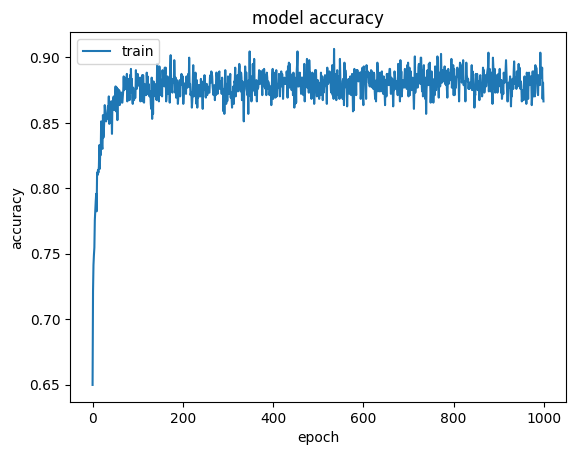

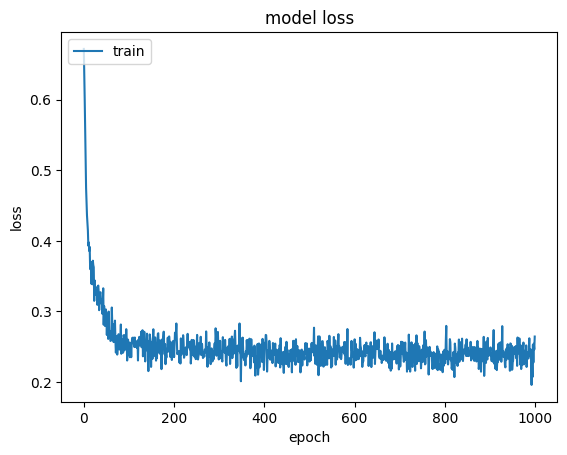

22/22 [==============================] - 0s 1ms/step - loss: 0.0809 - acc: 0.9714
score =  [0.08091211318969727, 0.9714285731315613]
11/11 [==============================] - 0s 758us/step


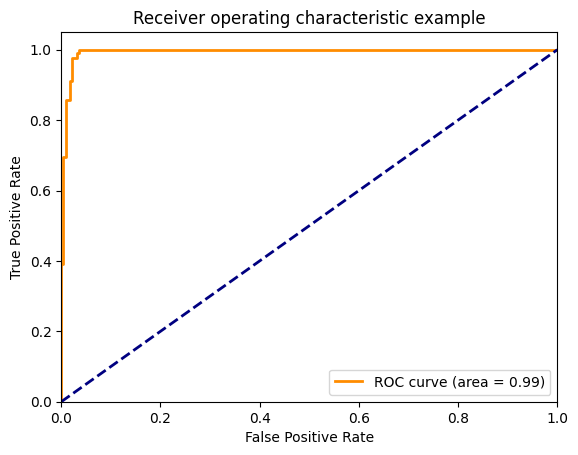

In [44]:
neural_network(df)

# Evaluation Metrics Summary

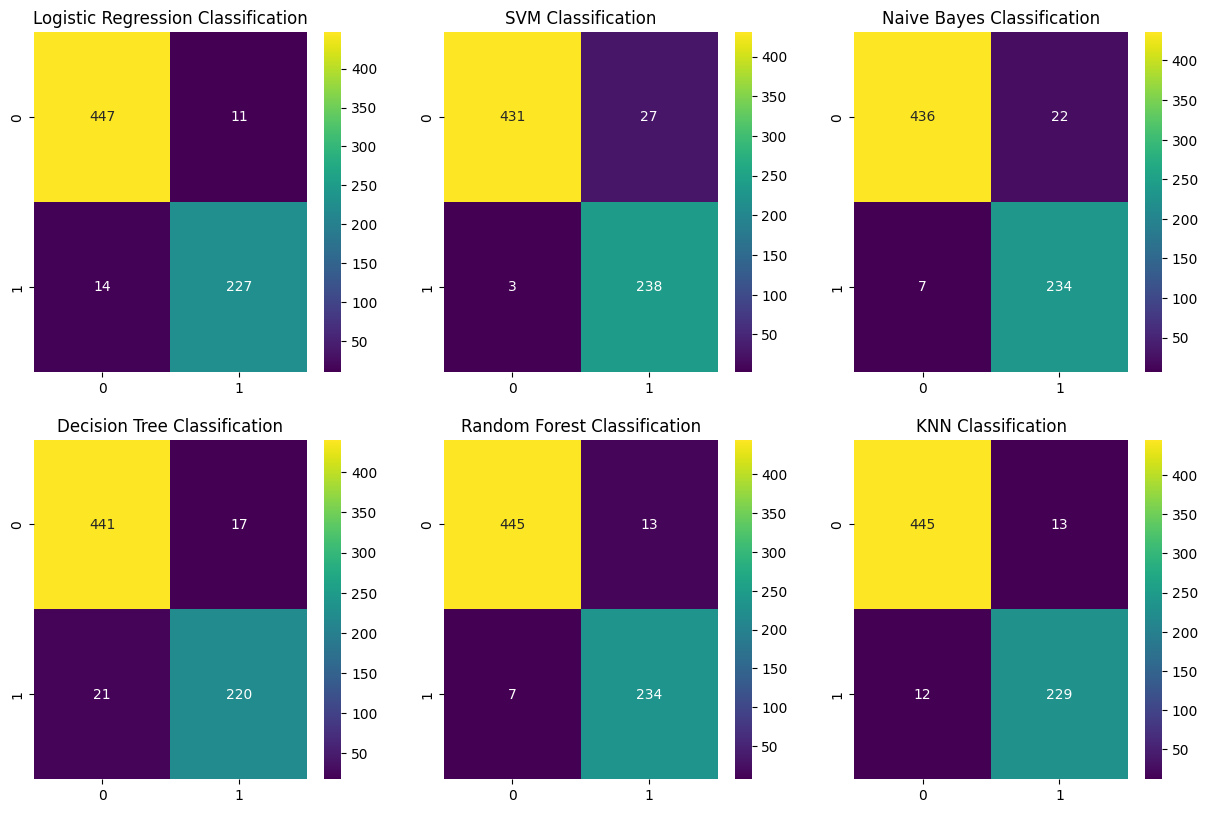

In [18]:
# The confusion matrix
# Confusion matrix is a specific table layout that allows visualization of the performance of an algorithm for supervised learning.
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg[3], annot=True,cmap="viridis" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla[3], annot=True,cmap="viridis" ,fmt='g', ax=ax6)
plt.show()

In [19]:
# Comparison of classification techniques
Accuracyscores = pd.Series([logreg[2], svmcla[2], nbcla[2], dtcla[2], rfcla[2], knncla[2]], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Accuracyscores)

Logistic Regression Score       0.964235
Support Vector Machine Score    0.957082
Naive Bayes Score               0.958512
Decision Tree Score             0.945637
Random Forest Score             0.971388
K-Nearest Neighbour Score       0.964235
dtype: float64
